[![alt text](https://avatars1.githubusercontent.com/u/59831504?s=400&v=4 "MtheEPIC User Icon")](https://github.com/MtheEPIC/KaggleProj)

[![alt text](https://avatars1.githubusercontent.com/u/59831504?s=400&v=4 "MtheEPIC User Icon")](https://github.com/MtheEPIC/DataImaging)

# Import libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.axes_style("whitegrid")

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler, binarize
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

Using TensorFlow backend.
C:\Users\mthee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mthee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mthee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mthee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

---
# Data preparation

## load data

In [2]:
train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0 is t shirt\
1 is trousers\
2 is pullover\
3 is dress\
4 is coat\
5 is sandals\
6 is shirt\
7 is sneaker\
8 is bag\
9 is ankle boots

In [4]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [5]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## split the images from the labels

## split the training data into train and validate

In [6]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

X_train = train_data[:, 1:] / 1
y_train = train_data[:, 0]

X_test = test_data[:, 1:] / 1#/128#/255
y_test = test_data[:, 0]

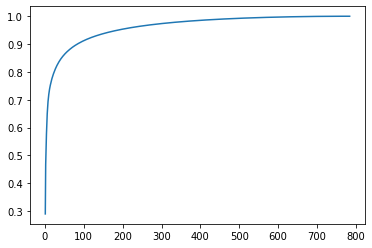

In [7]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(1, len(cumsum)+1)
plt.plot(x, cumsum)
plt.show()

In [8]:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)

# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

d = len(pca.singular_values_)
pca2 = PCA(n_components=d)
X_test_pca = pca2.fit_transform(X_test)
d

84

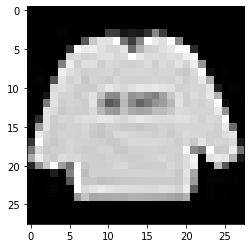

In [9]:
first_image = X_train[0]

first_image = np.array(first_image, dtype='uint8')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [10]:
def paint():
    tmp = train_df.groupby('label').sum()
    train_data = np.array(tmp, dtype='float32')

    first_image = train_data[0]

    first_image = np.array(first_image, dtype='uint8')
    pixels = first_image.reshape((28, 28))
    import numpy as np; np.random.seed(0)

    import seaborn as sns; sns.set()

    # uniform_data = np.random.rand(10, 12)
    uniform_data = pixels#//500
    ax = sns.heatmap(uniform_data)

    uniform_data.max()

In [11]:
# x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [12]:
def evaluate(true, pred):
#     model_accuracy = roc_auc_score(true, pred, multi_class="ovr")
#     null_accuracy = roc_auc_score(true, true.replace(1, 0))
    
#     print("Null AUC Score: {:.5f}".format(null_accuracy))
#     print("Model AUC Score: {:.5f}".format(model_accuracy))

#     if null_accuracy >= model_accuracy:
#         print("The model isn't effective")
# #         return
#     else:
#         print("The model is better then a 'dumb' model")
    print("confusion_matrix:\n", confusion_matrix(true, pred))
    print(classification_report(true, pred))

In [13]:
# len(predictions)
# y_test
# evaluate(y_test, predictions)

---
## Models

### Naive Bayes

In [14]:
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
predictions = gnb.predict(X_test_pca)
evaluate(y_test, predictions)

confusion_matrix:
 [[752   0  20  39  22   1  57  11  98   0]
 [  6 371   2 533   6   1  48   1  32   0]
 [ 20   0 451   0 179   6 211  12 121   0]
 [135 155  10 500  60  11  69   3  57   0]
 [ 11   1 109  17 644   3 167   1  46   1]
 [  7   0   1   0   1 740  28 132  79  12]
 [231   3  79  22 144  13 410   8  90   0]
 [  1   0   2   0   0 248   6 580  49 114]
 [  5   0  89   0  15  33  48  61 734  15]
 [  5   0   2   0   0  36  13  79 102 763]]
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69      1000
         1.0       0.70      0.37      0.48      1000
         2.0       0.59      0.45      0.51      1000
         3.0       0.45      0.50      0.47      1000
         4.0       0.60      0.64      0.62      1000
         5.0       0.68      0.74      0.71      1000
         6.0       0.39      0.41      0.40      1000
         7.0       0.65      0.58      0.61      1000
         8.0       0.52      0.73      0.61      1000
         

In [15]:
# mnb = MultinomialNB()
# mnb.fit(X_train_pca, y_train)
# predictions = mnb.predict(X_test_pca)
# evaluate(y_test, predictions)

### random forest

In [16]:
rf = RandomForestClassifier(random_state=0, max_depth=None, n_estimators=100)
rf.fit(X_train_pca, y_train)
predictions = rf.predict(X_test_pca)
evaluate(y_test, predictions)

confusion_matrix:
 [[801   4  28  66  11  10  56   0  11  13]
 [ 12 534   9 409   4   2  29   0   1   0]
 [ 12   0 622   7 152   5 142   0  60   0]
 [ 66  88  19 747  51   2  25   0   0   2]
 [  5   8 118  34 732   1  89   0  13   0]
 [  1   0   1   2   1 901   4  21  47  22]
 [240   3 118  34 169   6 403   1  24   2]
 [  0   0   0   0   0 421   0 269 213  97]
 [  8   1 195  12  71  87  46  66 477  37]
 [  2   0   0   0   0  72   0  48  65 813]]
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75      1000
         1.0       0.84      0.53      0.65      1000
         2.0       0.56      0.62      0.59      1000
         3.0       0.57      0.75      0.65      1000
         4.0       0.61      0.73      0.67      1000
         5.0       0.60      0.90      0.72      1000
         6.0       0.51      0.40      0.45      1000
         7.0       0.66      0.27      0.38      1000
         8.0       0.52      0.48      0.50      1000
         

In [17]:
from sklearn import metrics
# scores = cross_val_score(rf, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
# rf_score = np.sqrt(-scores)
scores = cross_val_score(rf, X_train_pca, y_train, cv=5)
rf_score = scores
print("Accuracy: %0.2f (+/- %0.2f)" % (rf_score.mean(), rf_score.std() * 2))

Accuracy: 0.87 (+/- 0.01)


### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#now lets find the optimum K 
err_rate = []
for i in range(1,10):
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train_pca, y_train)
    pred_i=k.predict(X_test_pca)

    err_rate.append(np.mean(pred_i !=y_test))

In [ ]:
index = err_rate.index(min(err_rate)) + 1
index

In [ ]:
nbrs = KNeighborsClassifier(n_neighbors=index)
nbrs.fit(X_train_pca, y_train)
predictions = nbrs.predict(X_test)